In [1]:
import pandas as pd
import spacy
import spacy.cli
import re
import io

**Carga de Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/TextMining/tweets/training.1600000.processed.noemoticon.csv'
dataset = pd.read_csv(data_path, encoding='latin-1', header=0)
dataset.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


**Dejando las columnas a evaluar**

In [4]:
dataset = dataset.iloc[:, [2,4,5]]

In [187]:
dataset.set_axis(["date", "user", "tweet"], axis=1, inplace=True)

In [188]:
dataset.head(2)

,date,user,tweet
0,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by ...
1,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Man...


In [189]:
t = dataset.iloc[1,2]

**Verificando contenido de primera linea de dataset**

In [191]:
t

'@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'

**Aplicacion de Expresiones regulares [Regex] para extraer los 3 usuarios etiquetados mas populares**

In [192]:
import re
def getAtt(tweet):
  regex = r"@[a-zA-Z0-9]+\s"
  try:  
    match = re.findall(regex, tweet)
    match = match[0].replace(' ','')
  except:
    pass
  return match

In [194]:
TresUsuarios = dataset['tweet'].apply(getAtt).dropna()

In [195]:
UsuariosPopulares = TresUsuarios.value_counts()

In [198]:
UsuariosPopulares

[]                943463
@mileycyrus         4142
@tommcfly           3736
@ddlovato           3166
@Jonasbrothers      1209
                   ...  
@iralu1                1
@lenahimechan          1
@Suicidalbunny         1
@furiousball           1
@oxhot                 1
Name: tweet, Length: 300821, dtype: int64

**Extraccion de Usuario @mileycyrus**

In [13]:
usuario1 = dataset[dataset['tweet'].str.contains("@mileycyrus")]
usuario1[:5]

,fecha,usuario,tweet
1020,Mon Apr 06 23:30:57 PDT 2009,kristenn_lynn,@mileycyrus hahaha dont be like that one time ...
2013,Tue Apr 07 00:45:20 PDT 2009,nathiuria,"@mileycyrus i have the same problem, but it's ..."
2072,Tue Apr 07 00:49:07 PDT 2009,amyamoore,@mileycyrus I guess counting sheep didn't work...
2079,Tue Apr 07 00:49:44 PDT 2009,xdokkenx,@mileycyrus I would too if it meant spending a...
2155,Tue Apr 07 00:56:41 PDT 2009,XFearLessX,@mileycyrus AWWW u seriously have the cutest d...


**Carga de Libreria Spacy Idioma**

In [156]:
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [164]:
nlp = spacy.load('en_core_web_sm')

sp = nlp.Defaults.stop_words
sp |= {"mileycyrus","miley",}

In [ ]:
sp

**USUARIO No. 1 @mileycyrus**

**1) Normalizacion de Texto con Lenguaje Natural**

In [166]:
def Normalizacion(corpus):
  newCorpus=[]
  for doc in corpus:
    newCorpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚÑ]','',doc)
                  .lower().strip().rstrip('\n').rstrip('\r\n'))
  return newCorpus

In [167]:
corpus_1 = Normalizacion(usuario1['tweet'])
corpus_1[:5]

['mileycyrus hahaha dont be like that one time in ny when you got 30 mins of sleep then got sick  love you',
 'mileycyrus i have the same problem but its 443 here lets see if counting works123456 57 58 132 133 134 no zs for me',
 'mileycyrus i guess counting sheep didnt work  hope you get some sleep',
 'mileycyrus i would too if it meant spending a day in heaven wmy mom and getting to see her again',
 'mileycyrus awww u seriously have the cutest dog miley sorry your not with her now  hope u get some sleep xoxo']

**2) Tokenizacion**

In [171]:
def tokenizacion(corpus):  #corpus igual a tabla
  newCorpus= []   #corpus lista vacia
  for doc in corpus:
    newCorpus.append(nlp(doc))
  return newCorpus  

In [172]:
corpus_2 = tokenizacion(corpus_1)
corpus_2[:5]

[mileycyrus hahaha dont be like that one time in ny when you got 30 mins of sleep then got sick  love you,
 mileycyrus i have the same problem but its 443 here lets see if counting works123456 57 58 132 133 134 no zs for me,
 mileycyrus i guess counting sheep didnt work  hope you get some sleep,
 mileycyrus i would too if it meant spending a day in heaven wmy mom and getting to see her again,
 mileycyrus awww u seriously have the cutest dog miley sorry your not with her now  hope u get some sleep xoxo]

**3) Remover Stopwords**

In [173]:
def removeStops(corpus):
  newCorpus = []
  for doc in corpus:
    s = ''   
    for token in doc:
      if(token.is_stop == False): #is_stop	¿El token es parte de una "lista de exclusión"?
        s = s + token.text + ' '  # text	Contenido de texto textual.
    newCorpus.append(s.strip('mileycyrus'))  #limpia el texto quitando vacios incio y final
  return newCorpus


In [174]:
corpus_3 = removeStops(corpus_2)
corpus_3[:10]

['hahaha nt like time ny got 30 mins sleep got sick   love ',
 'problem 443 lets counting works123456 57 58 132 133 134 zs ',
 'guess counting sheep nt work   hope sleep ',
 'ant spending day heaven wmy mom getting ',
 'awww u seriously cutest dog sorry   hope u sleep xoxo ',
 'httptwitpiccom2xszg   napping point need gma gon na come early ',
 'find quote nt answer better sleep xoxo germany morning ',
 'httptwitpiccom2y606   want sofie   s helllza cute ',
 'ouch ',
 'dude 4 mile run cold ass boston waking sucks ']

In [175]:
corpus_2[:10]

[mileycyrus hahaha dont be like that one time in ny when you got 30 mins of sleep then got sick  love you,
 mileycyrus i have the same problem but its 443 here lets see if counting works123456 57 58 132 133 134 no zs for me,
 mileycyrus i guess counting sheep didnt work  hope you get some sleep,
 mileycyrus i would too if it meant spending a day in heaven wmy mom and getting to see her again,
 mileycyrus awww u seriously have the cutest dog miley sorry your not with her now  hope u get some sleep xoxo,
 mileycyrus httptwitpiccom2xszg  napping at this point you may need a few of those gma is gonna come early,
 mileycyrus where did you find that quote no dont answer better sleep xoxo from germany where its already morning,
 mileycyrus httptwitpiccom2y606  i want a sofie  shes helllza cute,
 mileycyrus ouch mine too,
 mileycyrus dude i have to go on a 4 mile run in cold ass boston after waking up just now this sucks]

**4) Stemming y Lemmatization**

In [176]:
def stremmingLemmating(corpus):
  documents = tokenizacion(corpus)
  newCorpus = []
  for doc in documents:
    s = ''
    for token in doc:
      s = s + token.lemma_ + ' '
    newCorpus.append(s.strip())
  return newCorpus   

In [177]:
corpus_4 = stremmingLemmating(corpus_3)

In [178]:
corpus_4[:4]

['hahaha not like time ny get 30 min sleep get sick    love',
 'problem 443 let count works123456 57 58 132 133 134 zs',
 'guess count sheep not work    hope sleep',
 'ant spending day heaven wmy mom get']

**Creacion de Dataframe**

In [179]:
df1 = pd.DataFrame(corpus_4, columns=['tweet'])
df1

,tweet
0,hahaha not like time ny get 30 min sleep get s...
1,problem 443 let count works123456 57 58 132 13...
2,guess count sheep not work hope sleep
3,ant spending day heaven wmy mom get
4,awww u seriously cut dog sorry hope u sleep...
...,...
4486,hey vote teen choise awardshope ll win themple...
4487,httptwitpiccom7f5fy love amazing gorgeou...
4488,photo kiss iss beauutifull romantic
4489,definitley definitley get ticket concert decem...


**Texto Limpio**

In [180]:
df1[['tweet']].sample(1)

,tweet
3209,httptwitpiccom6dvj4 happy win good song a...


In [181]:
def my_tokenizer(tweet):
    return tweet.split() if tweet != None else []

In [182]:
from typing_extensions import Text
tokens = df1.tweet.map(my_tokenizer).sum()

**Cantidad de palabras para el WordCloud**

In [183]:
from typing_extensions import Text
from collections import Counter

counter = Counter(tokens)
counter.most_common(10)

[('not', 821),
 ('love', 792),
 ('u', 596),
 ('good', 511),
 ('m', 465),
 ('vote', 432),
 ('hope', 287),
 ('come', 253),
 ('win', 244),
 ('like', 234)]

In [184]:
%matplotlib inline
import matplotlib.pyplot as plt

In [185]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

# **WordCloud usaurio @mileycyrus**

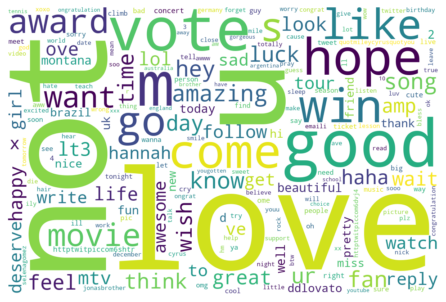

In [186]:
wordcloud(counter)

**Extraccion de Usuario @tommcfly**

In [199]:
usuario2 = dataset[dataset['tweet'].str.contains("@tommcfly ")]
usuario2[:5]

,date,user,tweet
1689,Tue Apr 07 00:19:09 PDT 2009,mcsteph94,@tommcfly hey saw u guys play @ pushover..didn...
1788,Tue Apr 07 00:26:52 PDT 2009,mcflyholland,@tommcfly Good morning Tom! Why can't I send y...
2513,Tue Apr 07 01:23:07 PDT 2009,ckstarlet,@tommcfly did you know that johnsons baby use ...
3028,Tue Apr 07 02:03:41 PDT 2009,McFLYBelgium,"@dougiemcfly @tommcfly good morning guys, how ..."
3523,Tue Apr 07 02:46:02 PDT 2009,lilmissvik,"@tommcfly hey, no chance of adding brighton or..."


**USUARIO No. 2 @tommcfly**

**1) Normalizacion de Texto con Lenguaje Natural**

In [200]:
def Normalizacion(corpus):
  newCorpus=[]
  for doc in corpus:
    newCorpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚÑ]','',doc)
                  .lower().strip().rstrip('\n').rstrip('\r\n'))
  return newCorpus

In [201]:
corpus_1 = Normalizacion(usuario2['tweet'])
corpus_1[:5]

['tommcfly hey saw u guys play  pushoverdidnt get 2 meet u tho cuz of th huge line  i was very upset  lola msg would make up 4 it',
 'tommcfly good morning tom why cant i send you a message this is too short for the question i have  well to bad for me i guess',
 'tommcfly did you know that johnsons baby use animals like cute bunnies to test their products',
 'dougiemcfly tommcfly good morning guys how are you all you know its frustrating i never get a reply',
 'tommcfly hey no chance of adding brighton or eastbourne to the ucap tour gutted im missing out this time round  i love you guys']

**2) Tokenizacion**

In [202]:
def tokenizacion(corpus):  #corpus igual a tabla
  newCorpus= []   #corpus lista vacia
  for doc in corpus:
    newCorpus.append(nlp(doc))
  return newCorpus

In [203]:
corpus_2 = tokenizacion(corpus_1)
corpus_2[:5]

[tommcfly hey saw u guys play  pushoverdidnt get 2 meet u tho cuz of th huge line  i was very upset  lola msg would make up 4 it,
 tommcfly good morning tom why cant i send you a message this is too short for the question i have  well to bad for me i guess,
 tommcfly did you know that johnsons baby use animals like cute bunnies to test their products,
 dougiemcfly tommcfly good morning guys how are you all you know its frustrating i never get a reply,
 tommcfly hey no chance of adding brighton or eastbourne to the ucap tour gutted im missing out this time round  i love you guys]

**3) Remover Stopwords**

In [204]:
def removeStops(corpus):
  newCorpus = []
  for doc in corpus:
    s = ''   
    for token in doc:
      if(token.is_stop == False): #is_stop	¿El token es parte de una "lista de exclusión"?
        s = s + token.text + ' '  # text	Contenido de texto textual.
    newCorpus.append(s.strip('@tommcfly'))  #limpia el texto quitando vacios incio y final
  return newCorpus

In [205]:
corpus_3 = removeStops(corpus_2)
corpus_3[:5]

[' hey saw u guys play   pushoverdidnt 2 meet u tho cuz th huge line   upset   lola msg 4 ',
 ' good morning tom nt send message short question   bad guess ',
 ' know johnsons baby use animals like cute bunnies test products ',
 'dougiemcfly tommcfly good morning guys know frustrating reply ',
 ' hey chance adding brighton eastbourne ucap tour gutted m missing time round   love guys ']

In [206]:
corpus_2[:5]

[tommcfly hey saw u guys play  pushoverdidnt get 2 meet u tho cuz of th huge line  i was very upset  lola msg would make up 4 it,
 tommcfly good morning tom why cant i send you a message this is too short for the question i have  well to bad for me i guess,
 tommcfly did you know that johnsons baby use animals like cute bunnies to test their products,
 dougiemcfly tommcfly good morning guys how are you all you know its frustrating i never get a reply,
 tommcfly hey no chance of adding brighton or eastbourne to the ucap tour gutted im missing out this time round  i love you guys]

**4) Stemming y Lemmatization**

In [207]:
def stremmingLemmating(corpus):
  documents = tokenizacion(corpus)
  newCorpus = []
  for doc in documents:
    s = ''
    for token in doc:
      s = s + token.lemma_ + ' '
    newCorpus.append(s.strip())
  return newCorpus  

In [208]:
corpus_4 = stremmingLemmating(corpus_3)

In [209]:
corpus_4[:5]

['hey see u guy play    pushoverdidnt 2 meet u tho cuz th huge line    upset    lola msg 4',
 'good morning tom not send message short question    bad guess',
 'know johnson baby use animal like cute bunny test product',
 'dougiemcfly tommcfly good morning guy know frustrating reply',
 'hey chance add brighton eastbourne ucap tour gutted m miss time round    love guy']

**Creacion de Dataframe**

In [210]:
df2 = pd.DataFrame(corpus_4, columns=['tweet'])
df2

,tweet
0,hey see u guy play pushoverdidnt 2 meet u t...
1,good morning tom not send message short questi...
2,know johnson baby use animal like cute bunny t...
3,dougiemcfly tommcfly good morning guy know fru...
4,hey chance add brighton eastbourne ucap tour g...
...,...
3825,record star girl jb
3826,studio watch video guy jonas brother night ...
3827,go to trip england holiday m excite
3828,heya tom follow peter facinelli twilight ht...


**Texto Limpio**

In [211]:
df2[['tweet']].sample(1)

,tweet
1574,answer someday thank


In [212]:
def my_tokenizer(tweet):
    return tweet.split() if tweet != None else []

In [215]:
from typing_extensions import Text
tokens = df2.tweet.map(my_tokenizer).sum()

**Cantidad de palabras para el WordCloud**

In [216]:
from typing_extensions import Text
from collections import Counter

counter = Counter(tokens)
counter.most_common(10)

[('not', 783),
 ('tom', 678),
 ('m', 455),
 ('love', 455),
 ('come', 369),
 ('good', 347),
 ('u', 341),
 ('xx', 303),
 ('guy', 287),
 ('x', 270)]

In [217]:
%matplotlib inline
import matplotlib.pyplot as plt

In [218]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

# **WordCloud usaurio @tommcfly**

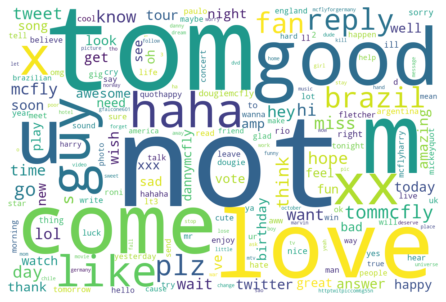

In [219]:
wordcloud(counter)

# **Extraccion de Usuario @ddlovato**

In [222]:
usuario3 = dataset[dataset['tweet'].str.contains("@ddlovato")]
usuario3[:5]

,date,user,tweet
459,Mon Apr 06 22:51:34 PDT 2009,toritor11,@ddlovato @David_Henrie ummmmm i cant find it.
572,Mon Apr 06 22:58:30 PDT 2009,lovatolover,@ddlovato Do you hate us?? Please don't
7031,Tue Apr 07 07:02:58 PDT 2009,mariapersson,@ddlovato Wish that i could see it.. Thats th...
7088,Tue Apr 07 07:05:11 PDT 2009,xxBEJEALOUSxx,"@ddlovato hey demi, wen are you and selena gon..."
8610,Fri Apr 17 20:31:31 PDT 2009,Julie_Dances,@ddlovato ahhhh i wish i could go to the dalla...


**USUARIO No. 1 @ddlovato**

**1) Normalizacion de Texto con Lenguaje Natural**

In [220]:
def Normalizacion(corpus):
  newCorpus=[]
  for doc in corpus:
    newCorpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚÑ]','',doc)
                  .lower().strip().rstrip('\n').rstrip('\r\n'))
  return newCorpus

In [223]:
corpus_1 = Normalizacion(usuario3['tweet'])
corpus_1[:5]

['ddlovato davidhenrie ummmmm i cant find it',
 'ddlovato do you hate us please dont',
 'ddlovato wish that i could see it  thats the downside of living in sweden good luck anyway',
 'ddlovato hey demi wen are you and selena gonna do another video i miss them',
 'ddlovato ahhhh i wish i could go to the dallas showbut i wont be near there then']

**2) Tokenizacion**

In [224]:
def tokenizacion(corpus):  #corpus igual a tabla
  newCorpus= []   #corpus lista vacia
  for doc in corpus:
    newCorpus.append(nlp(doc))
  return newCorpus  

In [225]:
corpus_2 = tokenizacion(corpus_1)
corpus_2[:5]

[ddlovato davidhenrie ummmmm i cant find it,
 ddlovato do you hate us please dont,
 ddlovato wish that i could see it  thats the downside of living in sweden good luck anyway,
 ddlovato hey demi wen are you and selena gonna do another video i miss them,
 ddlovato ahhhh i wish i could go to the dallas showbut i wont be near there then]

**3) Remover Stopwords**

In [226]:
def removeStops(corpus):
  newCorpus = []
  for doc in corpus:
    s = ''   
    for token in doc:
      if(token.is_stop == False): #is_stop	¿El token es parte de una "lista de exclusión"?
        s = s + token.text + ' '  # text	Contenido de texto textual.
    newCorpus.append(s.strip('@ddlovato'))  #limpia el texto quitando vacios incio y final
  return newCorpus

In [227]:
corpus_3 = removeStops(corpus_2)
corpus_3[:5]

[' davidhenrie ummmmm nt find ',
 ' hate nt ',
 ' wish   s downside living sweden good luck ',
 ' hey demi wen selena gon na video miss ',
 ' ahhhh wish dallas showbut wo nt near ']

In [228]:
corpus_2[:5]

[ddlovato davidhenrie ummmmm i cant find it,
 ddlovato do you hate us please dont,
 ddlovato wish that i could see it  thats the downside of living in sweden good luck anyway,
 ddlovato hey demi wen are you and selena gonna do another video i miss them,
 ddlovato ahhhh i wish i could go to the dallas showbut i wont be near there then]

**4) Stemming y Lemmatization**

In [229]:
def stremmingLemmating(corpus):
  documents = tokenizacion(corpus)
  newCorpus = []
  for doc in documents:
    s = ''
    for token in doc:
      s = s + token.lemma_ + ' '
    newCorpus.append(s.strip())
  return newCorpus   

In [230]:
corpus_4 = stremmingLemmating(corpus_3)

In [231]:
corpus_4[:4]

['davidhenrie ummmmm not find',
 'hate not',
 'wish    s downside living sweden good luck',
 'hey demi wen selena go to video miss']

**Creacion de Dataframe**

In [232]:
df3 = pd.DataFrame(corpus_4, columns=['tweet'])
df3

,tweet
0,davidhenrie ummmmm not find
1,hate not
2,wish s downside living sweden good luck
3,hey demi wen selena go to video miss
4,ahhhh wish dallas showbut will not near
...,...
3480,hope soon
3481,fall asleep chasecoy wake ddlovato go good day
3482,vote not wait
3483,finally 15 tomorrow mirandabuzz jennettemccurd...


**Texto Limpio**

In [233]:
df3[['tweet']].sample(1)

,tweet
2526,lmaowow amazingly odd


In [234]:
def my_tokenizer(tweet):
    return tweet.split() if tweet != None else []

In [235]:
from typing_extensions import Text
tokens = df3.tweet.map(my_tokenizer).sum()

**Cantidad de palabras para el WordCloud**

In [236]:
from typing_extensions import Text
from collections import Counter

counter = Counter(tokens)
counter.most_common(10)

[('not', 760),
 ('love', 620),
 ('demi', 576),
 ('m', 530),
 ('ddlovato', 482),
 ('u', 445),
 ('come', 367),
 ('s', 273),
 ('good', 258),
 ('wish', 256)]

In [237]:
%matplotlib inline
import matplotlib.pyplot as plt

In [238]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

# **WordCloud usaurio @ddlovato**

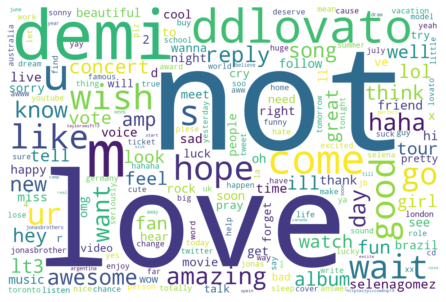

In [239]:
wordcloud(counter)